In [11]:
Month = input("Input the month in form YYYY-MM")

Input the month in form YYYY-MM2019-08


In [12]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc

In [13]:
read_file = pd.read_excel(r"C:\Users\thuynh3\abc.xlsx") 
# Write the dataframe object into csv file 
read_file.to_csv ("Test.csv", index = None, header=True) 
    
# read csv file and convert into a dataframe object for pandas
df  = pd.DataFrame(pd.read_csv("Test.csv")) 
df = df.dropna(how='all', axis=1)#drop empty columns

In [14]:
for i in range(len(df.columns)):
    if Month in df.columns[i]:
        monthcolumn = df.columns[i]
        break

In [15]:
outbound_name = "Outbound"
outbound_colors = ["blue", "brown", "purple", "green","pink"]
outbound_a = 12
outbound_b = 17
tap_name = "Tap"
tap_colors =["red", "blue", "green", "yellow","orange"]
tap_a = 20
tap_b = 25
inbound_name = "Inbound"
inbound_colors = ["blue", "orange","green","red","purple","brown","pink"]
inbound_a = 2
inbound_b = 9

def pie(pie_name,colors,num_a,num_b):
    labels = []
    sizes = []
    colors = colors
    for i in range(num_a,num_b):
        a = df.at[i,"Unnamed: 0"] #get the label
        labels.append(a)

    for i in range(num_a,num_b):
        b = int(df.iloc[i][monthcolumn])
        sizes.append(b)
    x = np.char.array(labels)
    y = np.array(sizes)
    porcent = 100.*y/y.sum()

    patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

    sort_legend = False
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))

    plt.legend(patches, labels, loc='center right', bbox_to_anchor=(-0.1, 1.),
               fontsize=8)
    plt.title(pie_name +" for " + monthcolumn[:10])
    plt.show()

inbound, outbound or tap ?inbound outbound tap


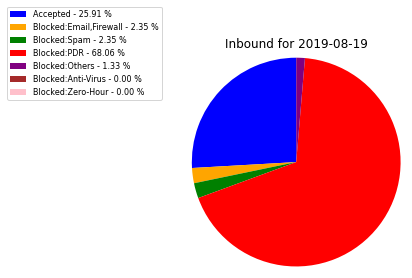

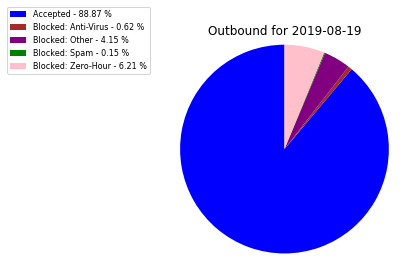

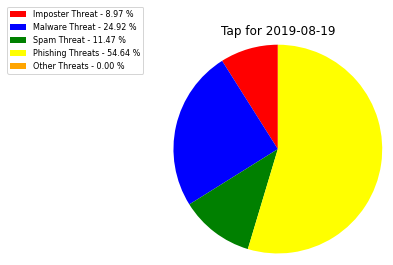

In [16]:
question = input("inbound, outbound or tap ?")
if "inbound" in question:
    pie(inbound_name, inbound_colors, inbound_a, inbound_b)
if "outbound" in question:
    pie(outbound_name, outbound_colors, outbound_a, outbound_b)
if "tap" in question:
    pie(tap_name, tap_colors, tap_a, tap_b)


In [17]:
num_months = input("""Input the months in this format: YYYY-MM YYYY-MM YYYY-MM YYYY-MM  or YYYY-MM to YYYY-MM
Example: 2019-03 2019-05 2019-07    if you wanted some specific months. Go as many as you want
2019-08 to 2020-02         if you wanted all months from august 2019 to february 2020""")


Input the months in this format: YYYY-MM YYYY-MM YYYY-MM YYYY-MM  or YYYY-MM to YYYY-MM
Example: 2019-03 2019-05 2019-07    if you wanted some specific months. Go as many as you want
2019-08 to 2020-02         if you wanted all months from august 2019 to february 20202019-08 to 2020-03


In [18]:
#Process month in 2 type: a to b, and a b c d
if("to" in num_months):   #02-2020 to 10-2020 =>
    temp = ""
    num_months = [x.strip() for x in num_months.split("to")]
    from datetime import datetime, timedelta
    from collections import OrderedDict

    dates = [num_months[0], num_months[1]]
    start, end = [datetime.strptime(_, "%Y-%m") for _ in dates]
    a = OrderedDict(((start + timedelta(_)).strftime(r"%Y-%m"), None) for _ in range((end - start).days)).keys()
    for i in a:
        temp = temp + str(i) + " "
    temp = temp + num_months[1]
    num_months = temp
num_months = [x.strip() for x in num_months.split(" ")]

In [19]:
#num_months = "2020-05 2020-02 2019-04"
#num_months = num_months.split(" ")
value = []
labels = []
date = []

for i in range(2,9):
    a = df.at[i,"Unnamed: 0"] #get the label
    labels.append(a)
    
for i in num_months:#get the data
    list1 = []
    for j in range(1,len(df.columns),2):
        if(str(i) in df.columns[j]):
            date.append(df.columns[j][:7])
            for k in range(2,9):
                b = float(df.iloc[k][df.columns[j]])
                list1.append(b)
    value.append(list1)
    
dk= pd.DataFrame(data = value, columns = labels, index = date)#create a dataset
dk

,Accepted,"Blocked:Email,Firewall",Blocked:Spam,Blocked:PDR,Blocked:Others,Blocked:Anti-Virus,Blocked:Zero-Hour
2019-08,3036964.0,275211.0,275171.0,7978568.0,156281.0,156.0,103.0
2019-09,3194651.0,595977.0,279060.0,7314421.0,563273.0,228.0,93.0
2019-10,3474288.0,722319.0,311630.0,7659265.0,268792.0,167.0,107.0
2019-11,3455428.0,679974.0,249035.0,7685130.0,260788.0,302.0,85.0
2019-12,3488960.0,2162367.0,191610.0,6196902.0,242065.0,103.0,87.0
2020-01,3212923.0,2204439.0,184655.0,5796211.0,240517.0,380.0,406.0
2020-02,3076842.0,832893.0,547347.0,229116.0,292844.0,1312.0,1531.0
2020-03,342432.0,23424.0,2342.0,234234.0,564664.0,4564.0,4564.0


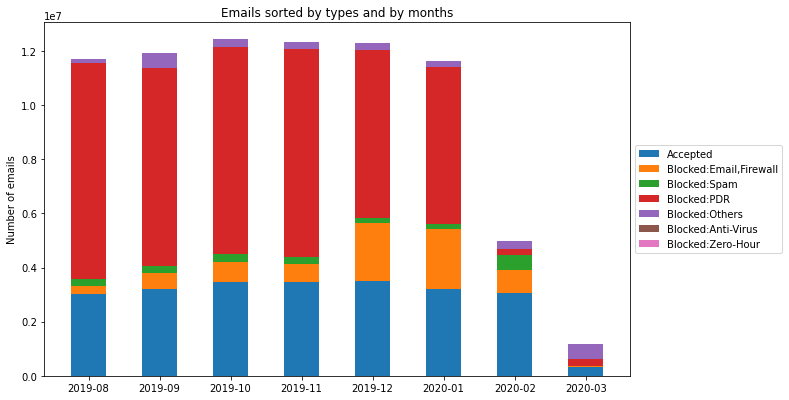

In [20]:
a = dk[labels[0]].tolist()
b =  dk[labels[1]].tolist()
c =  dk[labels[2]].tolist()
d =  dk[labels[3]].tolist()
e =  dk[labels[4]].tolist()
f =  dk[labels[5]].tolist()
g =  dk[labels[6]].tolist()


width = 0.5

fig, ax = plt.subplots()

ax.bar(date, a, width, label= labels[0])
ax.bar(date, b, width, bottom=a, label= labels[1])
ax.bar(date, c, width,bottom=[sum(values) for values in zip(a, b)], label= labels[2])
ax.bar(date, d, width,bottom=[sum(values) for values in zip(a, b, c)], label= labels[3])
ax.bar(date, e, width,bottom=[sum(values) for values in zip(a, b, c, d)], label= labels[4])
ax.bar(date, f, width,bottom=[sum(values) for values in zip(a, b ,c ,d , e)], label= labels[5])
ax.bar(date, g, width, bottom=[sum(values) for values in zip(a, b, c, d, e)], label=labels[6])


ax.set_ylabel('Number of emails')
ax.set_title('Emails sorted by types and by months')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 6.5)
#ax.legend()
#plt.show()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

leg = ax.legend( loc = 'center left', bbox_to_anchor = (1.0, 0.5))

fig.savefig(r'Q:\Information Security\Operations\Monthly Reporting\Archer\minh_test\graphs\bar', bbox_extra_artists=(leg,), bbox_inches='tight',dpi=100)
#plt.savefig('bar.png', dpi=100)

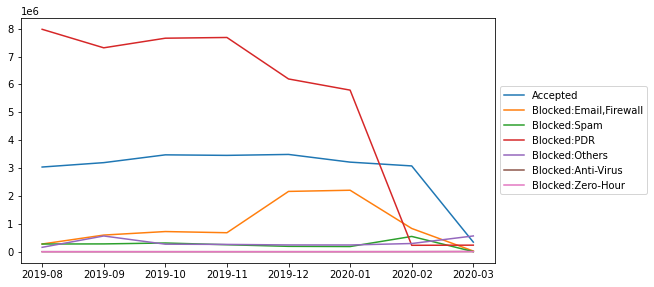

In [21]:
fig = dk.plot.line()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5, 4.5)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig(r'Q:\Information Security\Operations\Monthly Reporting\Archer\minh_test\graphs\line', bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=100)

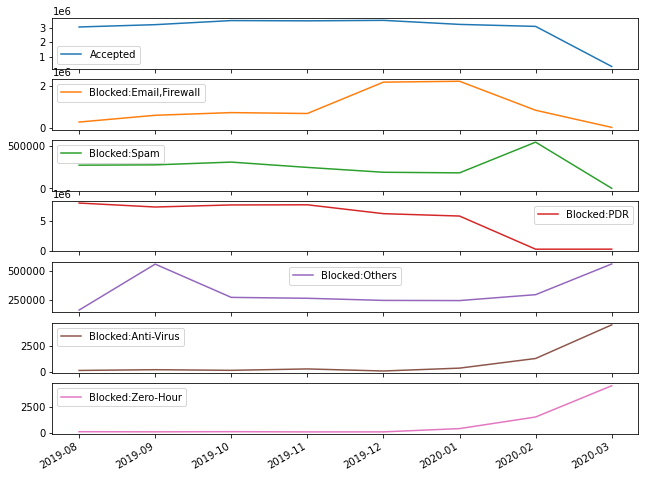

In [22]:
fig = dk.plot.line(subplots=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 8.5)
fig.savefig(r'Q:\Information Security\Operations\Monthly Reporting\Archer\minh_test\graphs\eachline.png', dpi=100)

things to note:
1. how to cater for outbound and Tap? How to reuse the old function? write a class. how to integrate the class to minimalize the code?
2. April 2019-need to change a number or it will not show